# IRIS Dataset

# Read and Load dataset

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#iris = pd.read_csv("C:\\Users\\user\\Downloads\\Iris.csv")



In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
x = iris.data
y = iris.target
features = iris.feature_names
target = iris.target_names

print("Feature Names:",features)
print("-"*100)
print("Target Names:", target)
print("-"*100)
print("data:", x[:10])
print("-"*100)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
----------------------------------------------------------------------------------------------------
Target Names: ['setosa' 'versicolor' 'virginica']
----------------------------------------------------------------------------------------------------
data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
----------------------------------------------------------------------------------------------------


In [5]:
df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = iris.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# MLP classifier

In [7]:
df_norm = df[iris.feature_names].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,0.666667,0.416667,0.711864,0.916667
103,0.555556,0.375000,0.779661,0.708333
45,0.138889,0.416667,0.067797,0.083333
18,0.388889,0.750000,0.118644,0.083333
109,0.805556,0.666667,0.864407,1.000000


In [8]:
df_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [9]:
df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
27,5.2,3.5,1.5,0.2,0
78,6.0,2.9,4.5,1.5,1
29,4.7,3.2,1.6,0.2,0
34,4.9,3.1,1.5,0.2,0
61,5.9,3.0,4.2,1.5,1


In [10]:
df = pd.concat([df_norm, df['target']], axis=1)
df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
70,0.444444,0.500000,0.644068,0.708333,1
140,0.666667,0.458333,0.779661,0.958333,2
34,0.166667,0.458333,0.084746,0.041667,0
18,0.388889,0.750000,0.118644,0.083333,0
109,0.805556,0.666667,0.864407,1.000000,2


In [11]:
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df, test_size = 0.3)
trainX = train[features]# taking the training data features
trainY=train.target# output of our training data
testX= test[features] # taking test data features
testY =test.target   #output value of test data
trainX.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,0.500000,0.333333,0.627119,0.458333
127,0.500000,0.416667,0.661017,0.708333
6,0.083333,0.583333,0.067797,0.083333
21,0.222222,0.708333,0.084746,0.125000
31,0.305556,0.583333,0.084746,0.125000


In [12]:
trainY.head(5)

73     1
127    2
6      0
21     0
31     0
Name: target, dtype: int32

In [13]:
testX.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,0.027778,0.375000,0.067797,0.041667
51,0.583333,0.500000,0.593220,0.583333
14,0.416667,0.833333,0.033898,0.041667
137,0.583333,0.458333,0.762712,0.708333
0,0.222222,0.625000,0.067797,0.041667


In [14]:
testY.head(5)

8      0
51     1
14     0
137    2
0      0
Name: target, dtype: int32

In [15]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(trainX, trainY)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
prediction = clf.predict(testX)
print(prediction)

[0 1 0 2 0 1 1 0 0 2 1 2 0 2 0 0 2 1 0 1 2 1 2 1 2 0 0 1 2 2 0 1 0 0 1 2 1
 1 2 1 0 1 2 2 2]


In [17]:
print(testY.values)

[0 1 0 2 0 1 1 0 0 2 1 2 0 2 0 0 2 1 0 1 2 2 2 1 2 0 0 1 2 2 0 1 0 0 1 2 1
 1 2 1 0 1 2 2 2]


### Accuracy with MLP 

In [18]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.9777777777777777


# Decision Tree

### Splitting Data into Training and Test Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.4, random_state=17)

### Creating Instance and prdicting labels

In [20]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz

clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(X_train, y_train)
clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)


In [21]:
data = df.drop(columns="target")

### Measuring Model Performance

In [22]:
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.9500


### Visualizing Decision Tree 

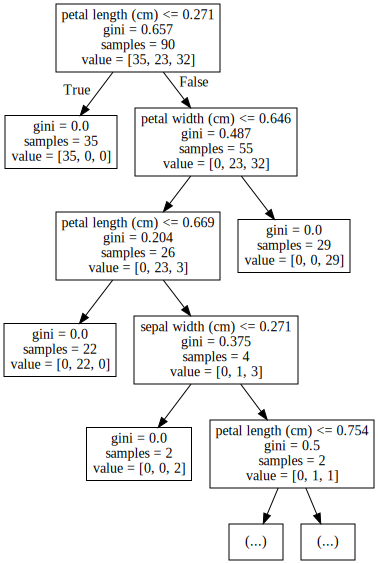

In [23]:
from sklearn import tree
from graphviz import Source
import pandas as pd

import graphviz
feat = data.columns 
Source(tree.export_graphviz(clf, out_file = None, feature_names = feat,max_depth=4))

# SVM

### Splitting Data into Training and Test Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split( df[iris.feature_names], df['target'],  test_size=0.2, random_state=20)

## Linear SVC

In [25]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test) *100))


Accuracy of linear SVC on training set: 97.50
Accuracy of linear SVC on test set: 90.00


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 349.29602999864755} with a score of 97
Best estimator accuracy on test set 90.00 


## SVC

In [27]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))


Accuracy of SVC on training set: 97.50
Accuracy of SVC on test set: 96.67


In [28]:
from sklearn.metrics import classification_report
import numpy as np
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Conclusion

In [29]:

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SVM","Train Score","Test Score"]
x.add_row(["LinearSVC",98.33,90.00])
x.add_row(["SVC",97.50,96.67])

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('****Final Conclusion:****')
print(x)

****Final Conclusion:****

+-----------+-------------+------------+
|    SVM    | Train Score | Test Score |
+-----------+-------------+------------+
| LinearSVC |    98.33    |    90.0    |
|    SVC    |     97.5    |   96.67    |
+-----------+-------------+------------+
